In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
credit_c=pd.read_csv("/content/credit_customers.csv")
credit=credit_c.copy()
credit.head(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
5,no checking,36.0,existing paid,education,9055.0,no known savings,1<=X<4,2.0,male single,none,...,no known property,35.0,none,for free,1.0,unskilled resident,2.0,yes,yes,good
6,no checking,24.0,existing paid,furniture/equipment,2835.0,500<=X<1000,>=7,3.0,male single,none,...,life insurance,53.0,none,own,1.0,skilled,1.0,none,yes,good
7,0<=X<200,36.0,existing paid,used car,6948.0,<100,1<=X<4,2.0,male single,none,...,car,35.0,none,rent,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
8,no checking,12.0,existing paid,radio/tv,3059.0,>=1000,4<=X<7,2.0,male div/sep,none,...,real estate,61.0,none,own,1.0,unskilled resident,1.0,none,yes,good
9,0<=X<200,30.0,critical/other existing credit,new car,5234.0,<100,unemployed,4.0,male mar/wid,none,...,car,28.0,none,own,2.0,high qualif/self emp/mgmt,1.0,none,yes,bad


In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [ ]:
# Changing object to category
cat= credit.select_dtypes(exclude=[np.number])
for i in list(cat.columns):
    credit[i]=credit[i].astype('category')

# Cheking Data Info
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   float64 
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   float64 
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   float64 
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   float64 
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   float64 
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

In [ ]:
credit.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [ ]:
credit.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [ ]:
# Spliting Personal Status
new= credit['personal_status'].str.split(" ",n=1,expand=True)
credit['gender']=new[0]
credit['marital_status']=new[1]
#Checking Data
credit.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,gender,marital_status
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,none,own,2.0,skilled,1.0,yes,yes,good,male,single
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,none,own,1.0,skilled,1.0,none,yes,bad,female,div/dep/mar
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,none,own,1.0,unskilled resident,2.0,none,yes,good,male,single
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,none,for free,1.0,skilled,2.0,none,yes,good,male,single
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,none,for free,2.0,skilled,2.0,none,yes,bad,male,single


In [ ]:
# Dropping Personal Status
credit.drop('personal_status',axis=1,inplace=True)

In [ ]:
# Cheking categorical features
cat=credit.select_dtypes(exclude=[np.number])
cat.columns

Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker', 'class', 'gender', 'marital_status'],
      dtype='object')

In [ ]:
# Numerical Features
num=credit.select_dtypes(include=[np.number])
num.columns

Index(['duration', 'credit_amount', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents'],
      dtype='object')

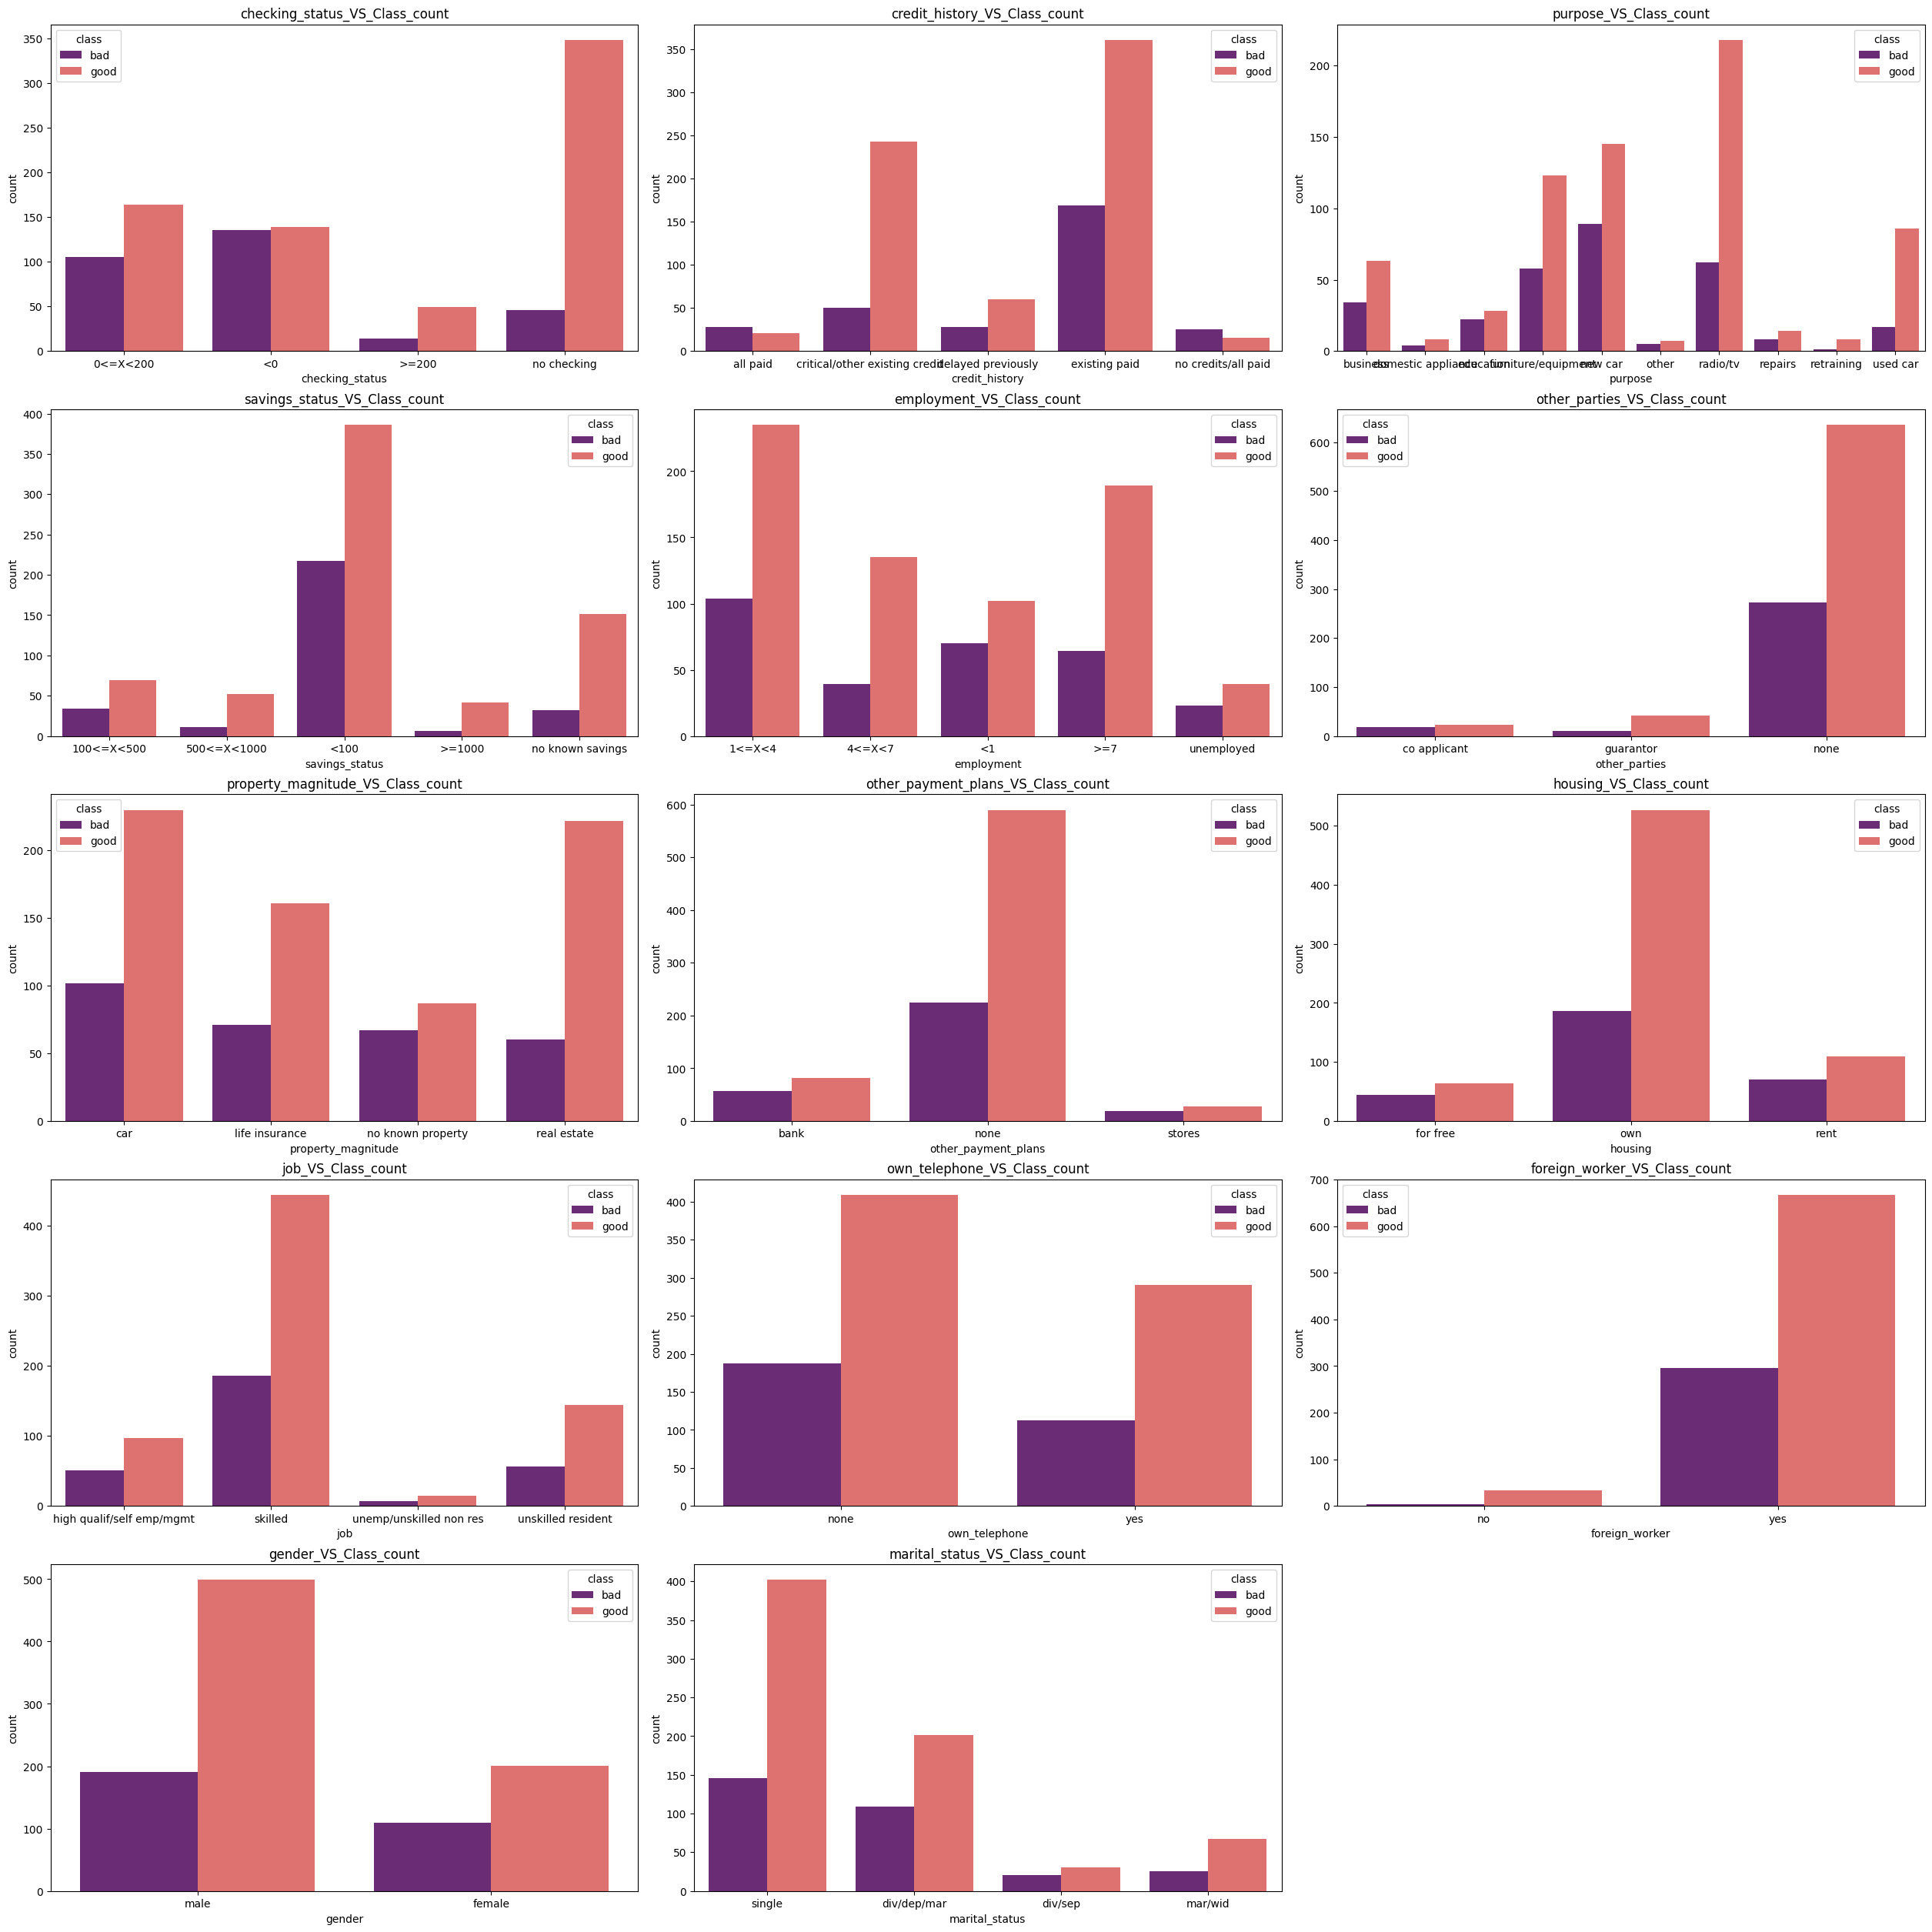

In [ ]:
lst=['checking_status', 'credit_history', 'purpose', 'savings_status','employment', 'other_parties', 'property_magnitude','other_payment_plans', 'housing', 'job', 'own_telephone',
     'foreign_worker', 'gender', 'marital_status']
plt.figure(figsize=(25,25),layout='constrained')
for i in range(len(lst)):
    plt.subplot(5,3,i+1)
    sns.countplot(data=credit,x=lst[i],palette='magma',hue='class')
    plt.title(lst[i]+'_VS_Class_count')
plt.show()

In [ ]:
# Label Encoding & Scaling
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

# Model Building
from sklearn.model_selection import GridSearchCV,StratifiedKFold,KFold,train_test_split,cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Model Evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score
from sklearn.pipeline import Pipeline
from sklearn import svm
# Time
from time import time

In [ ]:
scl=credit.select_dtypes(include=[np.number])

# Scaled Data
scl.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_encoder,credit_history_encoder,purpose_encoder,...,other_parties_encoder,property_magnitude_encoder,other_payment_plans_encoder,housing_encoder,job_encoder,own_telephone_encoder,foreign_worker_encoder,class_encoder,gender_encoder,marital_status_encoder
0,6.0,1169.0,4.0,4.0,67.0,2.0,1.0,1,1,6,...,2,3,1,1,1,1,1,1,1,3
1,48.0,5951.0,2.0,2.0,22.0,1.0,1.0,0,3,6,...,2,3,1,1,1,0,1,0,0,0
2,12.0,2096.0,2.0,3.0,49.0,1.0,2.0,3,1,2,...,2,3,1,1,3,0,1,1,1,3
3,42.0,7882.0,2.0,4.0,45.0,1.0,2.0,1,3,3,...,1,1,1,0,1,0,1,1,1,3
4,24.0,4870.0,3.0,4.0,53.0,2.0,2.0,1,2,4,...,2,2,1,0,1,0,1,0,1,3


In [ ]:
X=scl.drop('class_encoder',axis=1)
Y=scl['class_encoder']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     1000 non-null   float64
 1   credit_amount                1000 non-null   float64
 2   installment_commitment       1000 non-null   float64
 3   residence_since              1000 non-null   float64
 4   age                          1000 non-null   float64
 5   existing_credits             1000 non-null   float64
 6   num_dependents               1000 non-null   float64
 7   checking_status_encoder      1000 non-null   int64  
 8   credit_history_encoder       1000 non-null   int64  
 9   purpose_encoder              1000 non-null   int64  
 10  savings_status_encoder       1000 non-null   int64  
 11  employment_encoder           1000 non-null   int64  
 12  other_parties_encoder        1000 non-null   int64  
 13  property_magnitude_

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1000, 21) (700, 21) (300, 21)


In [ ]:
print(X)

     duration  credit_amount  installment_commitment  residence_since   age  \
0         6.0         1169.0                     4.0              4.0  67.0   
1        48.0         5951.0                     2.0              2.0  22.0   
2        12.0         2096.0                     2.0              3.0  49.0   
3        42.0         7882.0                     2.0              4.0  45.0   
4        24.0         4870.0                     3.0              4.0  53.0   
..        ...            ...                     ...              ...   ...   
995      12.0         1736.0                     3.0              4.0  31.0   
996      30.0         3857.0                     4.0              4.0  40.0   
997      12.0          804.0                     4.0              4.0  38.0   
998      45.0         1845.0                     4.0              4.0  23.0   
999      45.0         4576.0                     3.0              4.0  27.0   

     existing_credits  num_dependents  checking_sta

In [ ]:
print(Y)

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: class_encoder, Length: 1000, dtype: int64


In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7357142857142858


In [ ]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7166666666666667


In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51,23,342,34,34,34,26,45,21,97,54,65,34,21)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('Not Eligible for Credit')
else:
  print('Eligible for Credit')

[1]
Eligible for Credit


In [ ]:
import pickle

In [ ]:
filename = 'trained_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51,23,342,34,34,34,26,45,21,97,54,65,34,21)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('Not Eligible for Credit')
else:
  print('Eligible for Credit')

[1]
Eligible for Credit
